$\,\,Note:\,\,\Omega^{'}(\,\,in\,\,dynamo\,\,number\,\,P\,\,) = 10^{-8}$

## Profile

In [80]:
import numpy as np
import cmath
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib as mpl
# from tqdm import tqdm
from tqdm.notebook import tqdm



'--------------------------------------------------------------------------------------------'


def a(x):
    if x==0:
        return 0
    else:
        return x/(2*x+1)

def b(x):
    if x==0:
        return 0
    else:
        return (x+1)/(2*x+1)

def g(x):
    if x==0:
        return 0
    else:
        return x*(x+1)/(2*x+1)

def func_h(x):
    if x==0:
        return 0
    else:
        return x*(x+1)


'--------------------------------------------------------------------------------------------'


def alpha(x,a_profile):
    if a_profile == 'r_dependence':
        xc , d = 0.7 , 0.02
        ans = 3 * 3**(0.5) / 4 * ( 1 + math.erf( (x-xc) / d ) )

    elif a_profile == 'c':
        ans = 1
    
    return ans


'--------------------------------------------------------------------------------------------'


def Omega_1(x):
    ans = 1/2 * ( 1 + math.erf( ( x - 0.7 ) / 0.02 ) ) * 2 * math.pi * 456
    return ans

def d_Omega_r(x):
    ans = 50 / math.pi**(0.5) * math.exp( - ( ( x - 0.7 ) / 0.02 )**2 ) * 2 * math.pi * 456
    return ans


'--------------------------------------------------------------------------------------------'


def An(x):
    ans = a(x)*a(x+1)
    return ans

def Bn(x):
    ans = a(x)*b(x+1) + b(x)*a(x-1)
    return ans

def Cn(x):
    ans = b(x)*b(x-1)
    return ans

   


## Case A: $\,\,\,\,\Omega(r,\theta)\,,\,\eta=constant$

In [81]:
def generate2(P,M,n,a_profile='r_dependence'):
    x0,xo=0.65,1
    h=(xo-x0)/M
    h_2d=1/h**2
    h_d=1/h
    dim=(M-1)*n
    matrix = np.zeros((dim, dim))
    a_profile=a_profile
    for i in range(0,n):
        row_n=i*(M-1)
        
        
        for j in range(0,M-1):
            row=row_n+j
            col=row
            xj=x0+(j+1)*h

            if i%2 ==0:
                if j == 0:
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj
                elif j == M-2:
                    matrix[row][col-1] = h_2d - h_d/xj  - ( h_2d + h_d/xj ) * ( 1 / ( 3 + 2*h*(i+2) ) )
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 ) + ( h_2d + h_d/xj ) * ( 4 / ( 3 + 2*h*(i+2) ) )
                else:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj
                
                col_next=row+(M-1)
                col_before=row-(M-1)
                col_3next=row+3*(M-1)
                col_3before=row-3*(M-1)
                if i <= n-2:
                    matrix[row][col_next] = alpha(xj,a_profile) * ( b(i+2) - Bn(i+2)*b(i+2)-Cn(i+2)*a(i) )
                if i >= 1:
                    matrix[row][col_before] = alpha(xj,a_profile) * ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) )
                if i >=3:
                    matrix[row][col_3before] = alpha(xj,a_profile) * ( -An(i-2)*a(i) )
                if i <= n-4:
                    matrix[row][col_3next] = alpha(xj,a_profile) * ( -Cn(i+4)*b(i+2) )
                


            if i%2 ==1:
                if j == 0:
                    matrix[row][col] = (h_2d-h_d/xj) * ( 4 / (3-2*h/x0) ) -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj - (h_2d-h_d/xj) * ( 1 / (3-2*h/x0) )
                elif j == M-2:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                else:
                    matrix[row][col-1] = h_2d - h_d/xj
                    matrix[row][col] = -1*( 2*h_2d + func_h( i+1 )/xj**2 )
                    matrix[row][col+1] = h_2d + h_d/xj            



                '----------------角速度径向求导项----------------'
                col_n1=row+(M-1)
                col_n_1=row-(M-1)
                if i == n-1:
                    tem = a(i+1) * b(i+2) + b(i+1) * a(i) - a(i-1) * a(i)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * g(i) * ( 0.08 - 0.2 * tem )
                else:
                    tem = a(i+1) * b(i+2) + b(i+1) * a(i) - a(i-1) * a(i)
                    matrix[row][col_n_1] = P * d_Omega_r(xj) * g(i) * ( 0.08 - 0.2 * tem )

                    tem = b(i+3) * b(i+2) - a(i+1) * b(i+2) - b(i+1) * a(i+2)
                    matrix[row][col_n1] = P * d_Omega_r(xj) * g(i+2) * ( -0.08 - 0.2 * tem ) 

                if i>=3:
                    col_n_3 = row-3 * (M-1)
                    matrix[row][col_n_3] = P * d_Omega_r(xj) * g(i-2) * ( -0.2 ) * a(i-1) * a(i)
                if i<=n-4:
                    col_n3 = row+3 * (M-1)
                    matrix[row][col_n3] = P * d_Omega_r(xj) * g(i+4) * 0.2 * b(i+3) * b(i+2)
                        

                '----------------角速度纬向求导项----------------'
                # col_n1=row+(M-1)
                # col_n_1=row-(M-1)
                # xj_1=xj-h
                # xj1=xj+h
                # if i == n-1:
                #     matrix[row][col_n_1 - 1] = 1/ xj * xj_1/2*h_d * Omega_1(xj) * P * ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) ) * 0.2 * 2
                #     matrix[row][col_n_1 + 1] = -1/ xj * xj1/2*h_d * Omega_1(xj) * P * ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) ) * 0.2 * 2
                # else:
                #     matrix[row][col_n1 - 1] = 1/ xj * xj_1/2*h_d * Omega_1(xj) * P * ( b(i+2) - Bn(i+2)*b(i+2)-Cn(i+2)*a(i) ) * 0.2 * 2
                #     if col_n1 + 1 <= dim-1:
                #         matrix[row][col_n1 + 1] = -1/ xj * xj1/2*h_d * Omega_1(xj) * P * ( b(i+2) - Bn(i+2)*b(i+2)-Cn(i+2)*a(i) ) * 0.2 * 2
                #     matrix[row][col_n_1 - 1] = 1/ xj * xj_1/2*h_d * Omega_1(xj) * P * ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) ) * 0.2 * 2
                #     # if col_n_1 + 1 <= dim-1:
                #     matrix[row][col_n_1 + 1] = -1/ xj * xj1/2*h_d * Omega_1(xj) * P * ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) ) * 0.2 * 2
                
                # if i>=3:
                #     col_n_3 = row-3 * (M-1)
                #     matrix[row][col_n_3 - 1] = 1/ xj * xj_1/2*h_d * Omega_1(xj) * P * ( -An(i-2)*a(i) ) * 0.2 * 2
                #     matrix[row][col_n_3 + 1] = -1/ xj * xj1/2*h_d * Omega_1(xj) * P * ( -An(i-2)*a(i) ) * 0.2 * 2
                # if i<=n-4:
                #     col_n3 = row+3 * (M-1)
                #     matrix[row][col_n3 - 1] = 1/ xj * xj_1/2*h_d * Omega_1(xj) * P * ( -Cn(i+4)*b(i+2) ) * 0.2 * 2
                #     if col_n3 + 1 <= dim-1:
                #         matrix[row][col_n3 + 1] = -1/ xj * xj1/2*h_d * Omega_1(xj) * P * ( -Cn(i+4)*b(i+2) ) * 0.2 * 2

                '----------------AI处理的角速度纬向求导项----------------'
                # 定义辅助函数来处理边界处的耦合项
                def add_coupling_term(target_i, coeff_val):
                    # target_i: 耦合到的 Poloidal 谐波阶数索引 (i-1 或 i+1)
                    # coeff_val: 对应的系数 (包含 alpha, P, Omega 等)
                    
                    if target_i < 0 or target_i >= n:
                        return

                    target_row_start = target_i * (M - 1)
                    target_col = target_row_start + j # 对应当前径向位置 j 在目标块中的索引
                    
                    # 径向导数项: 1/r * d(rS)/dr ~ ( r_{j+1}S_{j+1} - r_{j-1}S_{j-1} ) / (2h*r_j)
                    # term_minus 对应 S_{j-1} 的系数
                    # term_plus  对应 S_{j+1} 的系数
                    
                    xj_1 = xj - h
                    xj1  = xj + h
                    
                    # 注意: h_d = 1/h. 
                    # 原始公式: 1/xj * (xj1 * S_{j+1} - xj_1 * S_{j-1}) / (2h)
                    # 系数:
                    term_minus = -1/xj * xj_1/2 * h_d * Omega_1(xj) * P * coeff_val
                    term_plus  =  1/xj * xj1/2  * h_d * Omega_1(xj) * P * coeff_val
                    
                    # 注意：你原代码中 term_minus 是正号，term_plus 是负号
                    # 原代码: matrix... = 1/xj * xj_1/2*h_d ... (对应 col-1)
                    # 原代码: matrix... = -1/xj * xj1/2*h_d ... (对应 col+1)
                    # 这意味着原代码计算的是 -d(rS)/dr ? 或者定义方向不同。
                    # 这里我保持你原代码的符号习惯：
                    term_minus =  1/xj * xj_1/2 * h_d * Omega_1(xj) * P * coeff_val
                    term_plus  = -1/xj * xj1/2  * h_d * Omega_1(xj) * P * coeff_val

                    l_target = target_i + 1

                    if j == 0:
                        # 内边界 (r = x0 + h)
                        # 需要 S_{j-1} 即 S_in (r=x0)。
                        # 良导体边界: S_in = 0.
                        # 所以 term_minus 项为 0，直接忽略。
                        
                        # S_{j+1} 是内部点 (target_col + 1)
                        matrix[row][target_col + 1] += term_plus

                    elif j == M - 2:
                        # 外边界 (r = xo - h)
                        # 需要 S_{j+1} 即 S_out (r=xo)。
                        # 势场边界: S' + (l+1)/r S = 0
                        # 二阶近似: S_out = (4*S_j - S_{j-1}) / K
                        # 其中 K = 3 + 2*h*(l+1)/xo
                        
                        K = 3 + 2 * h * (l_target + 1) / xo
                        
                        # 将 S_out 替换为 S_j (target_col) 和 S_{j-1} (target_col - 1)
                        # term_plus * S_out = term_plus * (4/K * S_j - 1/K * S_{j-1})
                        
                        matrix[row][target_col]     += term_plus * (4.0 / K)
                        matrix[row][target_col - 1] += term_minus + term_plus * (-1.0 / K)
                        
                    else:
                        # 内部点，直接赋值
                        matrix[row][target_col - 1] += term_minus
                        matrix[row][target_col + 1] += term_plus

                # 应用耦合
                # 1. 耦合到 i-1 (col_n_1)
                val = ( a(i) - An(i)*b(i+2)-Bn(i)*a(i) ) * 0.2 * 2
                add_coupling_term(i - 1, val)

                # 2. 耦合到 i+1 (col_n1)
                if i != n-1:
                    val = ( b(i+2) - Bn(i+2)*b(i+2)-Cn(i+2)*a(i) ) * 0.2 * 2
                    add_coupling_term(i + 1, val)
                
                # 3. 耦合到 i-3 (col_n_3)
                if i >= 3:
                    val = ( -An(i-2)*a(i) ) * 0.2 * 2
                    add_coupling_term(i - 3, val)

                # 4. 耦合到 i+3 (col_n3)
                if i <= n-4:
                    val = ( -Cn(i+4)*b(i+2) ) * 0.2 * 2
                    add_coupling_term(i + 3, val)
    return matrix




## Define Function

In [82]:
def get_eigvals(P,M,n,s='dont show',a_cfg='r_dependence',Case=3):
    matrix=generate2(P,M,n,a_cfg)

    # print(matrix)
    # matrix=generate3(P,M,n,a_cfg)
    
    eigvals = [(-i,cmath.sqrt(-i).real,cmath.sqrt(-i).imag) for i in np.linalg.eigvals(matrix)]

    reL=[]
    imL=[]
    for j in eigvals:
        if j[1] >= 0 and j[2] >=0:
            reL.append(j[1])
            imL.append(j[2])
        # if j[1] < j[2]:
        #     print('yes')
    
    if s == 'show':
        print(P)
        print(*list(zip(reL,imL)),sep='\n')
        print('-'*100)

    return reL , imL , matrix



def draw(ax,x,y,i,P,cmap,norm):
    if i=='n':
        # ax.scatter(x,y,s=10,marker='x')
        ax.scatter(x,y,s=1,c=[cmap(norm(P)) for i in range(len(x))])
    else:
        Color=cm.Accent(i)
        ax.scatter(x,y,'x',color=Color,s=10)



def get_alpha(P):
    R = 6.96*10**8
    w = 10**(-9)
    eta = 10**7
    ans = abs(P) * eta**2 / ( R**3 * w )
    return ans

def get_Ca(P):
    R = 6.96*10**8
    eta = 10**7
    w = 10**(-9)
    ans = abs(P) * eta / R **2 / w
    return ans

def T(k):
    import math
    R = 6.96*10**8
    eta = 10**7
    pi = math.pi
    ans = pi * R**2 / ( k**2 * eta ) / (365*24*3600)
    # ans = R**2 / ( 2*k**2 * eta ) / (365*24*3600)
    return ans



def solution(M=10,n=10,maxi=0,mini=-20,a_cfg='r_dependence',Case=3,P_num=100 ,draw_pic=True):
    # s='show'
    s='dont show'
    if draw_pic:
        fig,ax=plt.subplots(figsize=(7,7),dpi=100)
        cmap = plt.cm.viridis

    ans=[]
    PL = [i for i in np.linspace(mini,maxi,P_num)]
    for P in tqdm(PL,desc='计算中'):
        # print(P,M,n,s,a_cfg,Case)
        x , y , Matrix= get_eigvals(P,M,n,s,a_cfg,Case)
        # print(x,y)
        for i,j in zip(x,y):
            tem = abs( i-j )
            if tem < 1e-1:
                ans.append( ( round( i , 3 ) , round( j , 3 ) , round( abs(i-j)/i*100 , 3 ) , \
                             round( P , 3 ) , get_Ca(P) , round( 2*i**2 , 3 ) , round( T(i) , 3 ) ) )
        if draw_pic:
            norm = Normalize(vmin=mini, vmax=maxi)
            draw(ax,x,y,'n',P,cmap,norm)

    if draw_pic:
        cmap = mpl.cm.viridis
        norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
        im = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
        cb=fig.colorbar( im , ax=ax , shrink=0.5 )
        cb.ax.invert_yaxis()
        ax.set_xticks([i for i in np.linspace(0,50,11)])
        ax.set_yticks([i for i in np.linspace(0,50,11)])
        lim=5
        ax.set_xlim(0,lim*10)
        ax.set_ylim(0,lim*10)
        ax.plot([-100,100],[-100,100])
        ax.plot([-100,100],[100,-100])
        ax.set_aspect(1)
        ax.set_xlabel('Re(k)')
        ax.set_ylabel('Im(k)')
        ax.set_title('M=%d , n=%d'%(M,n))
        plt.show()

    L=[[]]
    count=0
    if len(ans) == 0:
        if draw_pic:
            return ans,fig,ax,L
        else:
            return ans,'None','None',L
    temP = ans[0][3]
    for var_a,var_b,var_c,var_d,var_e,var_f,var_g in ans:
        if abs(temP-var_d)/abs(var_d) < 0.1:
            L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )
        else:
            temP = var_d
            count += 1
            L.append( [] )
            L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )

    for i in L:
        tem = sorted(i,key=lambda x:x[2])
        var_a,var_b,var_c,var_d,var_e,var_f,var_g = str(tem[0][0]),str(tem[0][1]),str(tem[0][2])+'%',str(tem[0][3]),str(tem[0][4]),str(tem[0][5]),str(tem[0][6])
        # print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
            # "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )
        print( "kr=%s"%var_a , "ki=%s"%var_b , "diff=%s"%var_c , "P=%s"%var_d ,\
            "Ca=%s"%var_e, "lambda=%s"%var_f , "T=%s"%var_g )
    if draw_pic:
        return ans,fig,ax,L
    else:
        return ans,'None','None',L




## Solution

### SingleTest Case2

计算中:   0%|          | 0/100 [00:00<?, ?it/s]

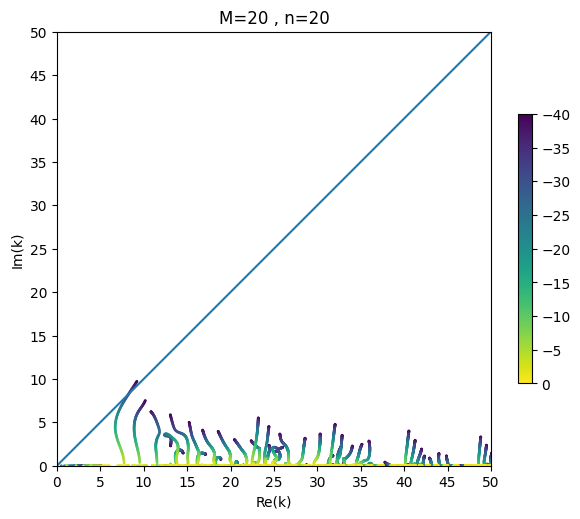

kr=8.276 ki=8.285 diff=0.116% P=-31.919 Ca=0.6589210909464575 lambda=136.974 T=70.462


In [83]:
# a_cfg='c'
a_cfg='r_dependence'
draw_pic = True
# draw_pic = False
mini=-40
maxi=0
M=20
n=20
Case=2
P_num=100
result,fig,ax,L= solution(M,n,maxi,mini,a_cfg,Case,P_num,draw_pic)


m:50 n:50
kr=8.657 ki=8.663 diff=0.068% P=-34.343 Ca=0.7089657307651759 lambda=149.884 T=64.393

m:20 n:20
kr=8.276 ki=8.285 diff=0.116% P=-31.919 Ca=0.6589210909464575 lambda=136.974 T=70.462

### MultiTest

In [84]:
# # %matplotlib widget 

  
# # a_cfg='c'
# a_cfg='r_dependence'
# mini=-20
# maxi=0
# M=10
# n=10
# Case=3
# P_num=200
# result = solution(M,n,maxi,mini,a_cfg,Case,P_num)

# '储存图像'
# for M in [10,20,30,40,45,50,55,60]:
#     for n in [10]:
#         result , fig , ax = solution(M,n,maxi,mini,a_cfg,Case,P_num)
#         # fig.savefig('pic//M=%d_n=%d.png'%(M,n))

# #计算alpha和T
#         if len(result) == 0:
#             continue
#         temP = result[0][3]
#         L=[[]]
#         count=0
#         for var_a,var_b,var_c,var_d,var_e,var_f,var_g in result:
#             if abs(temP-var_d)/abs(var_d) < 0.1:
#                 L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )
#             else:
#                 temP = var_d
#                 count += 1
#                 L.append( [] )
#                 L[count].append( (var_a,var_b,var_c,var_d,var_e,var_f,var_g) )

#         for i in L:
#             tem = sorted(i,key=lambda x:x[2])
#             var_a,var_b,var_c,var_d,var_e,var_f,var_g = str(tem[0][0]),str(tem[0][1]),str(tem[0][2])+'%',str(tem[0][3]),str(tem[0][4]),str(tem[0][5]),str(tem[0][6])
#             # print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
#                 # "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )
#             print( "kr=%s"%var_a , "ki=%s"%var_b , "diff=%s"%var_c , "P=%s"%var_d ,\
#                 "alpha=%s"%var_e, "lambda=%s"%var_f , "T=%s"%var_g )

# # for i in ans:
# #     var_a,var_b,var_c,var_d,var_e,var_f,var_g = i
# #     print( "kr=%f"%var_a , "ki=%f"%var_b , "diff=%f"%var_c , "P=%f"%var_d ,\
# #         "alpha=%f"%var_e, "lambda=%f"%var_f , "T=%f"%var_g )

## Test code

In [85]:
print( (6.96*10**8)**2 / 10**7 * 2 * math.pi * 456 * 10**(-9) /10**5)
print( 0.388 * (6.96*10**8)**2 * 10**(-9) / 10**7 )
print(3**0.5)
print(L)

1.387916025155794
18.7953408
1.7320508075688772
[[(8.423, 8.509, 1.018, np.float64(-33.131), np.float64(0.6839434108558168), 141.907, 68.013), (8.374, 8.435, 0.724, np.float64(-32.727), np.float64(0.6756026375526969), 140.259, 68.811), (8.325, 8.36, 0.423, np.float64(-32.323), np.float64(0.6672618642495772), 138.615, 69.628), (8.276, 8.285, 0.116, np.float64(-31.919), np.float64(0.6589210909464575), 136.974, 70.462), (8.226, 8.21, 0.2, np.float64(-31.515), np.float64(0.6505803176433378), 135.337, 71.314), (8.176, 8.134, 0.523, np.float64(-31.111), np.float64(0.642239544340218), 133.705, 72.184), (8.126, 8.057, 0.856, np.float64(-30.707), np.float64(0.6338987710370984), 132.079, 73.073), (8.077, 7.98, 1.199, np.float64(-30.303), np.float64(0.6255579977339787), 130.46, 73.98)]]
